<a href="https://colab.research.google.com/github/danhorsley/DS-Unit-4-Sprint-1-NLP/blob/master/Copy_of_LS_DS_421_Text_Data_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Natural Language Processing (NLP)
## *Data Science Unit 4 Sprint 2 Assignment 1*

Analyze a corpus of text using text visualization of token frequency. Try cleaning the data as much as possible. Try the following techniques: 
- Stemming
- Lemmatization
- Custom stopword removal
- Using frequency based stopwrod removal

You are free to use any dataset you are interested in. Kaggle is a great place to start. Feel free to sample the data if the dataset is too large to hanlde in memory. 

In [13]:
!pip install squarify

In [60]:
import pandas as pd
import numpy as np
sw = pd.read_csv('https://storage.googleapis.com/kaggle-datasets/25491/32521/SW_EpisodeIV.txt?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1562870394&Signature=X7rxF%2FEJmH2NOLqmr3TW8WchRkbppZXJngQmSZ%2Fa%2FIJcsF2xwLYJRPBVNB8Feh1NToRBMpSalUhNJ1%2Byz8uk%2BAz%2BuceJnDiagTFzcqIWPb%2BG8MJYKj8Wa0938fi7J0I9CdPAHDFnGP4k3gArJQRCnErDRzC1OUarIpjp8Z8ADh42tif9F3hqaQy%2BuoMh%2BHX8qrIR6NatWSslVzToxsXMBwQQId%2FHopyyOtfUnbr3kaqKqPESOymxOwWHnLMrESqrhGTZ6QUBuXXKBL3P2wLNHwpC4t3SnayHftJwaFYwJtjeW%2BIB8Rz3Y%2FlCq4MzQc8uPVckGw9EN7Jkm03uFM%2FhFw%3D%3D',sep='" "')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  This is separate from the ipykernel package so we can avoid doing imports until


In [61]:
sw = sw.reset_index(drop=True)
sw.columns = ['character','dialogue']
sw['dialogue']=sw['dialogue'].str.replace('"','')
sw.head()

,character,dialogue
0,THREEPIO,Did you hear that? They've shut down the main...
1,THREEPIO,We're doomed!
2,THREEPIO,There'll be no escape for the Princess this time.
3,THREEPIO,What's that?
4,THREEPIO,I should have known better than to trust the l...


In [0]:
def tokenize(text):
    sample = re.sub(r'[^a-zA-Z ^0-9]', '', text)
    tokens = sample.lower().split()
    return tokens

In [63]:
import re
sw['tokens'] = sw['dialogue'].apply(tokenize)
sw.head()

,character,dialogue,tokens
0,THREEPIO,Did you hear that? They've shut down the main...,"[did, you, hear, that, theyve, shut, down, the..."
1,THREEPIO,We're doomed!,"[were, doomed]"
2,THREEPIO,There'll be no escape for the Princess this time.,"[therell, be, no, escape, for, the, princess, ..."
3,THREEPIO,What's that?,"[whats, that]"
4,THREEPIO,I should have known better than to trust the l...,"[i, should, have, known, better, than, to, tru..."


In [0]:
#first experimenting with stems
from nltk.stem import PorterStemmer

ps = PorterStemmer()

token_stems=[]
for token in sw['tokens']:
  mini_stems=[]
  for word in token:
    mini_stems.append(ps.stem(word))
  token_stems.append(mini_stems)
sw['stems'] = token_stems

In [65]:
sw.head()

,character,dialogue,tokens,stems
0,THREEPIO,Did you hear that? They've shut down the main...,"[did, you, hear, that, theyve, shut, down, the...","[did, you, hear, that, theyv, shut, down, the,..."
1,THREEPIO,We're doomed!,"[were, doomed]","[were, doom]"
2,THREEPIO,There'll be no escape for the Princess this time.,"[therell, be, no, escape, for, the, princess, ...","[therel, be, no, escap, for, the, princess, th..."
3,THREEPIO,What's that?,"[whats, that]","[what, that]"
4,THREEPIO,I should have known better than to trust the l...,"[i, should, have, known, better, than, to, tru...","[i, should, have, known, better, than, to, tru..."


In [0]:
from collections import Counter
def count(docs):

        word_counts = Counter()
        appears_in = Counter()
        
        total_docs = len(docs)

        for doc in docs:
            word_counts.update(doc)
            appears_in.update(set(doc))

        temp = zip(word_counts.keys(), word_counts.values())
        
        wc = pd.DataFrame(temp, columns = ['word', 'count'])

        wc['rank'] = wc['count'].rank(method='first', ascending=False)
        total = wc['count'].sum()

        wc['pct_total'] = wc['count'].apply(lambda x: x / total)
        
        wc = wc.sort_values(by='rank')
        wc['cul_pct_total'] = wc['pct_total'].cumsum()

        t2 = zip(appears_in.keys(), appears_in.values())
        ac = pd.DataFrame(t2, columns=['word', 'appears_in'])
        wc = ac.merge(wc, on='word')

        wc['appears_in_pct'] = wc['appears_in'].apply(lambda x: x / total_docs)
        
        return wc.sort_values(by='rank')

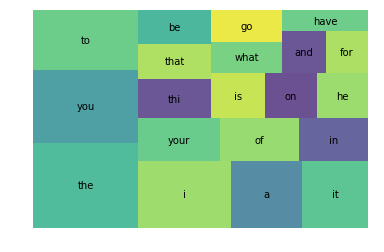

In [67]:
import squarify
import matplotlib.pyplot as plt
wc = count(sw['stems'])

wc_top20 = wc[wc['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

In [0]:
import spacy
from spacy.tokenizer import Tokenizer

nlp = spacy.load("en_core_web_sm")

# Tokenizer
tokenizer = Tokenizer(nlp.vocab)

In [0]:
#remaking tokens
tokens = []

for doc in tokenizer.pipe(sw['dialogue'], batch_size=500):
    
    doc_tokens = []
    
    for token in doc: 
      if (token.is_stop == False) and (token.is_punct==False) and (token.is_space==False):
        doc_tokens.append(token.text.lower())
   
    tokens.append(doc_tokens)
    
sw['tokens'] = tokens

In [74]:
sw.head()

,character,dialogue,tokens,stems
0,THREEPIO,Did you hear that? They've shut down the main...,"[hear, that?, they've, shut, main, reactor., w...","[did, you, hear, that, theyv, shut, down, the,..."
1,THREEPIO,We're doomed!,"[we're, doomed!]","[were, doom]"
2,THREEPIO,There'll be no escape for the Princess this time.,"[there'll, escape, princess, time.]","[therel, be, no, escap, for, the, princess, th..."
3,THREEPIO,What's that?,"[what's, that?]","[what, that]"
4,THREEPIO,I should have known better than to trust the l...,"[known, better, trust, logic, half-sized, ther...","[i, should, have, known, better, than, to, tru..."


In [0]:
def get_lemmas(text):
    lemmas = []
    
    doc = nlp(text)
    for token in doc:
        if ((token.is_stop ==False) and (token.is_punct==False) and (token.is_space==False)):
            lemmas.append(token.lemma_)
            
    return lemmas

In [0]:
#now experimenting with lemmas
sw['lemmas'] = sw['dialogue'].apply(get_lemmas)

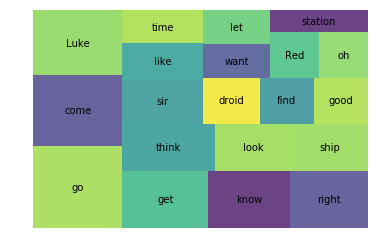

In [81]:
wc = count(sw['lemmas'])
wc_top20 = wc[wc['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

In [0]:
my_stops = set(['get','go','let','oh','know','come','want'])

In [0]:
 def new_get_lemmas(text):
    lemmas = []
    
    doc = nlp(text)
    for token in doc:
        if ((token.is_stop ==False) and (token.is_punct==False) and (token.is_space==False) and token.lemma_ not in my_stops):
            lemmas.append(token.lemma_)
            
    return lemmas

In [0]:
sw['lemmas_stops'] = sw['dialogue'].apply(new_get_lemmas)

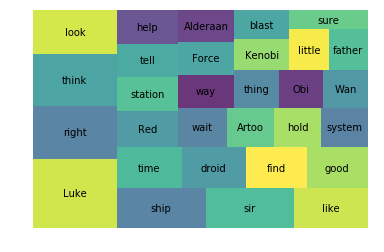

In [106]:
wc = count(sw['lemmas_stops'])
wc_top30 = wc[wc['rank'] <= 30]

squarify.plot(sizes=wc_top30['pct_total'], label=wc_top30['word'], alpha=.8 )
plt.axis('off')
plt.show()

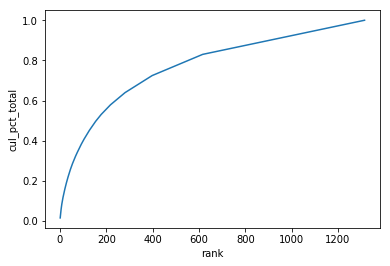

In [101]:
#this plot seems much more gradual than the one from the lecture with more common idnetifyign words so 
#not much points in statistically trimming it
import seaborn as sns
sns.lineplot(x='rank', y='cul_pct_total', data=wc);

In [105]:
#now statistical trimming - let's try taking out the top 200 words and having a look
wc_bottom = wc[wc['rank'] >= 200]

wc_bottom.head(20)

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
761,ready,5,5,200.0,0.001216,0.557744,0.00495
809,money,5,5,201.0,0.001216,0.558959,0.00495
812,large,5,5,202.0,0.001216,0.560175,0.00495
822,idea,5,5,203.0,0.001216,0.561391,0.00495
868,deflector,5,5,204.0,0.001216,0.562606,0.00495
1008,tractor,5,5,205.0,0.001216,0.563822,0.00495
1011,seven,5,5,206.0,0.001216,0.565038,0.00495
1059,hang,5,5,207.0,0.001216,0.566253,0.00495
1074,rescue,5,5,208.0,0.001216,0.567469,0.00495
1087,clear,4,5,209.0,0.001216,0.568685,0.00396


## Stretch Goals

* Write a web scraper that can scrape "Data Scientist" job listings from indeed.com.
* Look ahead to some of the topics from later this week:
 - Part of Speech Tagging
 - Named Entity Recognition
 - Document Classification
* Try a different visualization techniques
* Automate the process of retriving job listings. ;)